In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# ON BRANCH no-hot-spots-in-training
test = pd.read_csv('~/tmp/dynamic-learning-rivers/examples/ModEx_reproducibility/cold-hot-spot-Nov-2023-testing.csv')
train = pd.read_csv('~/tmp/dynamic-learning-rivers/input_data/ICON-ModEx_Data.csv')
predict = pd.read_csv('~/tmp/dynamic-learning-rivers/scripts/post_01_output_ml_predict_avg.csv')
predict_std = pd.read_csv('~/tmp/dynamic-learning-rivers/scripts/post_01_output_ml_predict_std.csv')
all_obs = pd.concat([test,train], axis='index')

In [3]:
predict.set_index('Sample_ID', inplace=True)
predict_std.set_index('Sample_ID', inplace=True)
test.set_index('Sample_ID', inplace=True)
train.set_index('Sample_ID', inplace=True)
all_obs.set_index('Sample_ID', inplace=True)

In [4]:
test_predict_subset = predict.loc[test.index,:]
test_predict_subset_std = predict_std.loc[test.index,:]

array([[1.        , 0.36674206],
       [0.36674206, 1.        ]])

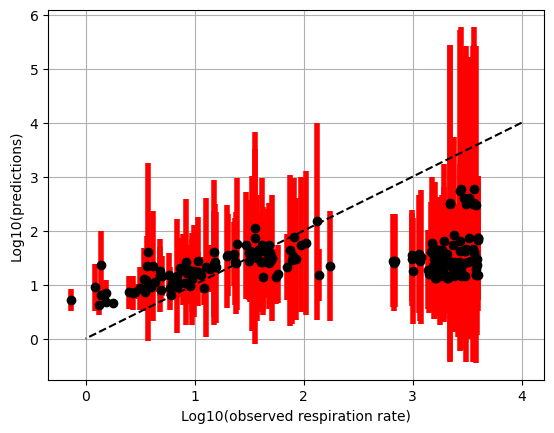

In [5]:
fig, ax = plt.subplots()

#ax.plot(
#    test['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'],
#    test_predict_subset['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'],
#    'k.')

ax.errorbar(
    x=np.log10(np.abs(test['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'])),
    y=np.log10(np.abs(test_predict_subset['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'])),
    yerr=np.abs(np.log10(test_predict_subset_std['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'])),
    elinewidth=4,
    fmt='ko',
    ecolor='r')

ax.plot([4.0,0.0],[4.0,0.0],'k--')

ax.grid()
ax.set_xlabel('Log10(observed respiration rate)')
ax.set_ylabel('Log10(predictions)')
np.corrcoef(
    test['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'],
    test_predict_subset['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'])

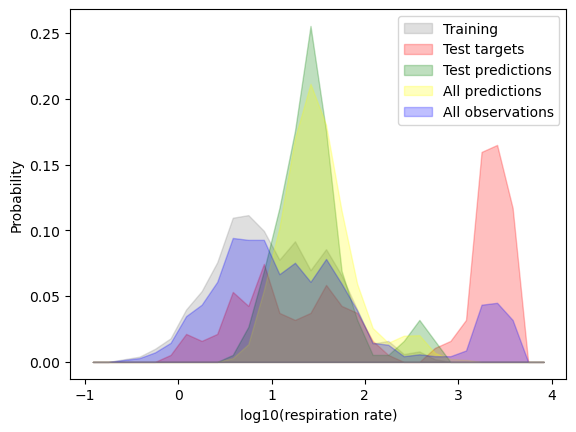

In [6]:
fig, ax = plt.subplots()

# Set binning
nbin=30
min_bin=-1
max_bin=4

#=========================================
# Histogram of the training set
#=========================================
counts, bins = np.histogram(np.log10(np.abs(
    train[
        'Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'])), bins=nbin, range=(min_bin,max_bin))
    
# Find the center of each bin
# Divide number of counts in each bin by total number of counts => probability
fill_handle = ax.fill_between(
    (bins[:-1]+bins[1:])/2,0,counts/np.sum(counts), 
    color=('gray'), alpha=0.25)

#=========================================
# Histogram of the test set
#=========================================
counts, bins = np.histogram(np.log10(np.abs(
    test[
        'Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'])), bins=nbin, range=(min_bin,max_bin))
    
# Find the center of each bin
# Divide number of counts in each bin by total number of counts => probability
fill_handle = ax.fill_between(
    (bins[:-1]+bins[1:])/2,0,counts/np.sum(counts), 
    color=('red'), alpha=0.25)

#=========================================
# Histogram of the test set predictions
#=========================================
counts, bins = np.histogram(np.log10(np.abs(
    test_predict_subset[
        'Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'])), bins=nbin, range=(min_bin,max_bin))
    
# Find the center of each bin
# Divide number of counts in each bin by total number of counts => probability
fill_handle = ax.fill_between(
    (bins[:-1]+bins[1:])/2,0,counts/np.sum(counts), 
    color=('green'), alpha=0.25)

#=========================================
# Histogram of all predictions
#=========================================
counts, bins = np.histogram(np.log10(np.abs(
    predict[
        'Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'])), bins=nbin, range=(min_bin,max_bin))
    
# Find the center of each bin
# Divide number of counts in each bin by total number of counts => probability
fill_handle = ax.fill_between(
    (bins[:-1]+bins[1:])/2,0,counts/np.sum(counts), 
    color=('yellow'), alpha=0.25)

#=========================================
# Histogram of all observations
#=========================================
counts, bins = np.histogram(np.log10(np.abs(
    all_obs[
        'Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'])), bins=nbin, range=(min_bin,max_bin))
    
# Find the center of each bin
# Divide number of counts in each bin by total number of counts => probability
fill_handle = ax.fill_between(
    (bins[:-1]+bins[1:])/2,0,counts/np.sum(counts), 
    color=('blue'), alpha=0.25)

ax.set_xlabel('log10(respiration rate)')
ax.set_ylabel('Probability')
ax.legend(['Training','Test targets','Test predictions','All predictions','All observations'])

In [7]:
# We have observed 94 hot spots out of 690 sites:
100*94/690

13.623188405797102

In [8]:
# The hot spot cut off is more like -200 mgO2/L/hr than -500 mgO2/L/hr.

# The ML model successfully predicts 12 out of the 94 as hot spots
# (i.e. dramatically different) and it does not highlight any others.
# This is not too surprising given that ML models tend to prefer to
# predict their mean values.

# CONUS-scale predictions produce about 588 hot spots out of 11124 => 5% of sites are hot spots
np.shape(predict[predict['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'] < -200.0])

(588, 9)

In [9]:
# This ratio is about the same as the number of hot spots predicted from the training set 12/690 = 2%
np.shape(test_predict_subset[test_predict_subset['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'] < -200.0])

(12, 9)

Text(0, 0.5, 'AI priority parameter')

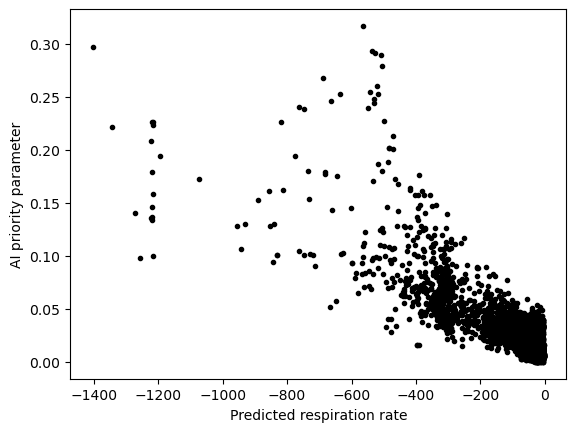

In [13]:
fig, ax = plt.subplots()

ax.plot(
    predict['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'],
    predict['combined.metric'],
    'k.')

ax.set_xlabel('Predicted respiration rate')
ax.set_ylabel('AI priority parameter')

Text(0, 0.5, 'Estimated error in prediction')

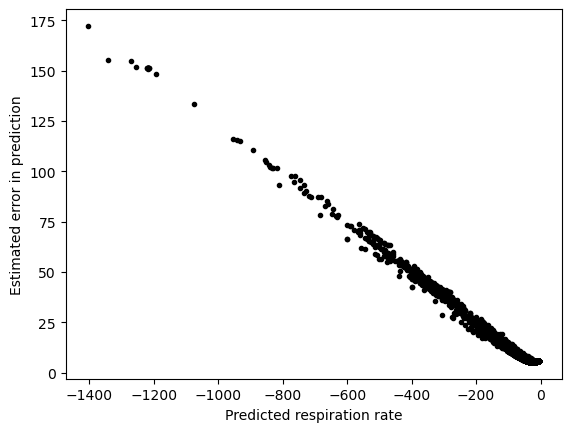

In [16]:
fig, ax = plt.subplots()

ax.plot(
    predict['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'],
    predict['mean.error'],
    'k.')

ax.set_xlabel('Predicted respiration rate')
ax.set_ylabel('Estimated error in prediction')

Text(0, 0.5, 'Site uniqueness relative to other sites (PCA)')

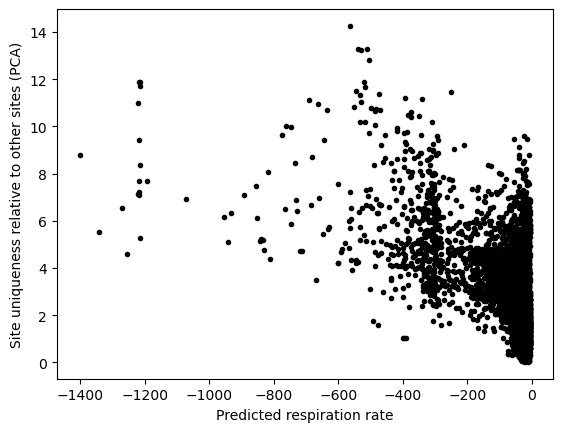

In [17]:
fig, ax = plt.subplots()

ax.plot(
    predict['Normalized_Respiration_Rate_mg_DO_per_H_per_L_sediment'],
    predict['pca.dist'],
    'k.')

ax.set_xlabel('Predicted respiration rate')
ax.set_ylabel('Site uniqueness relative to other sites (PCA)')